# Business Case: Netflix - Data Exploration and Visualisation

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  Defining Problem Statement and Analysing basic metrics

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

- identify what kind of movies and TV shows are highly rated
- which are the countries where more highly rated content can be released
- see how user / content preferences have changed over the years

# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

## overall shape of the data and datatype of all the attributes

In [12]:
df.shape

(8807, 12)

In [13]:
# data-type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

> **Observation:**
>> - The data is in the form of a 2D array containing 8807 rows and 12 columns
>> - The column names are:  'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'
>> - only the year column is of int64 data type
>> - **Missing value detection:** as can be seen columns director, cast, country, date_added, rating and duration have missing values since the non-null count is lower than the number of 8807

## categorical attributes analysis

In [15]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

**Observation:** there are 2 types of content - 'Movie' and 'TV Show'

In [16]:
df['director'].unique().shape

(4529,)

**Observation:** There is content from 4529 directors on Netflix, but this is not accurate since there are rows where there are multiple directors clubbed together and separated by commas.

In [17]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

**Observation:** There are movies and TV shows that released in multiple countries. But this is not accurate, since we can see that there are movies and TV shows released in multiple countries which are clubbed together separated by commas. 

In [18]:
# Write code to get unique countries

In [19]:
df['release_year'].sort_values().unique()

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [20]:
df['release_year'].max()

2021

In [21]:
df['release_year'].min()

1925

**Observation:** Netflix has content released between 1925 and 2021

In [22]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
df[(df['rating'] == '74 min') | (df['rating'] == '84 min')|( df['rating'] == '66 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**Observation:** These are the ratings given on Netflix 
>'PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'
       
> out of which we can clearly see that 74 min, 84 min, 66 min are durations which by mistake has been entered in rating column

In [24]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

**Observation:** as can be seen different content has different duration. So they need to be standardized and converted to minutes of overall content duration.

## Statistical Summary

In [25]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [26]:
# max, min, mean, std

In [27]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [28]:
df[df['date_added']=='January 1, 2020'].count()

show_id         109
type            109
title           109
director         98
cast            107
country         103
date_added      109
release_year    109
rating          109
duration        109
listed_in       109
description     109
dtype: int64

In [29]:
df[df['rating']=='TV-MA'].count()

show_id         3207
type            3207
title           3207
director        2117
cast            2881
country         2931
date_added      3205
release_year    3207
rating          3207
duration        3207
listed_in       3207
description     3207
dtype: int64

**Observations:** 
> - out of 8807 rows movies occur 6131 times
> - January 1, 2020 maximum number of content was added on the same date.
> - Out of 8803 ratings 3207 got a rating of 'TV-MA'



In [30]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Missing Value & Outlier check 

## Missing value detection

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observation:**  as can be seen columns **director, cast, country, date_added, rating and duration** have missing values since the non-null count is lower than the number of rows (8807 rows )

In [32]:
temp = pd.read_csv('netflix.csv')
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
temp[temp['duration'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [34]:
temp[temp['rating'].isna()].count()

show_id         4
type            4
title           4
director        1
cast            4
country         3
date_added      4
release_year    4
rating          0
duration        4
listed_in       4
description     4
dtype: int64

In [35]:
def swap(x):
    x['duration'] = x['rating']
    x['rating'] = np.nan
    return x

temp[temp['duration'].isna()] = temp[temp['duration'].isna()].apply(swap, axis=1)

In [36]:
temp[temp['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


**Observation:** missing values in duration is resolved

In [37]:
temp[temp['rating'].isna()].count()

show_id         7
type            7
title           7
director        4
cast            7
country         6
date_added      7
release_year    7
rating          0
duration        7
listed_in       7
description     7
dtype: int64

In [38]:
temp[temp['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [39]:
temp['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Since TV-MA is the most common rating. SO we will fill up the missing ratings with TV-MA

In [40]:
temp['rating'].fillna('TV-MA',inplace=True)

In [41]:
temp[temp['rating'].isna()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Observation:** Missing ratings are now filled in and there are no further missing rating as seen above.

In [42]:
temp[temp['show_id']=='s5990']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...


In [43]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observation:** date_added column has some missing values which we can fill in with a approximate value of 'January 1,' + release_year

In [44]:
temp['date_added'].fillna('January 1, '+ str(temp['release_year']),inplace=True)

In [45]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [46]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [47]:
temp['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [48]:
temp[temp['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [49]:
temp[temp['director']=="Louis C.K."]["country"].value_counts()

United States    3
Name: country, dtype: int64

In [50]:
temp[temp['director']=="Louis C.K."]["country"].value_counts().keys()[0]

'United States'

In [51]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
temp['country'].describe()[2]

'United States'

In [53]:
temp['country'].fillna(temp['country'].describe()[2], inplace=True)

In [54]:
def getCountry(x):
    if len(x["country"].value_counts()) == 0:
        pass
    else:
        x['country_top'] = x["country"].value_counts().keys()[0] # gives the country the director has released most films in
    return x

In [55]:
#temp = temp.groupby(["director"]).apply(getCountry)

In [56]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As can be seen country column now has no missing values

In [58]:
temp['director'].fillna(temp['director'].describe()[2], inplace=True)

In [59]:
temp['cast'].fillna(temp['cast'].describe()[2], inplace=True)

In [60]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [61]:
df[df['duration'].isna()] = df[df['duration'].isna()].apply(swap, axis=1)
df['rating'].fillna('TV-MA',inplace=True)
df['date_added'].fillna('January 1, '+ str(df['release_year']),inplace=True)
df['country'].fillna(df['country'].describe()[2], inplace=True)
df['director'].fillna(df['director'].describe()[2], inplace=True)
df['cast'].fillna(df['cast'].describe()[2], inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observation:** as can be seen there are no more missing values in any of the columns.

## unnesting of the data in columns like Cast, Director, Country, listed_in

In [63]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [64]:
temp['director_list'] = temp['director'].str.split(", ")

In [65]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson]
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Julien Leclercq]
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[Rajiv Chilaka]
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[Rajiv Chilaka]


In [66]:
temp['cast_list'] = temp['cast'].str.split(", ")

In [67]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson],[David Attenborough]
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[Rajiv Chilaka],[David Attenborough]
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[Rajiv Chilaka],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."


In [68]:
list(temp[temp['show_id']=='s2']['cast_list'])# just to show the parsed list

[['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng']]

In [69]:
temp['country_list'] = temp['country'].str.split(", ")

In [70]:
temp['category'] = temp['listed_in'].str.split(", ")

In [71]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson],[David Attenborough],[United States],[Documentaries]
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[United States],"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[Rajiv Chilaka],[David Attenborough],[United States],"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[Rajiv Chilaka],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"[International TV Shows, Romantic TV Shows, TV..."


In [72]:
temp=temp.explode('category').reset_index().drop('index',axis=1)

In [73]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson],[David Attenborough],[United States],Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],TV Dramas
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[Rajiv Chilaka],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[United States],Crime TV Shows


In [74]:
temp=temp.explode('country_list').reset_index().drop('index',axis=1)
temp=temp.explode('cast_list').reset_index().drop('index',axis=1)
temp=temp.explode('director_list').reset_index().drop('index',axis=1)


In [75]:
temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Thabang Molaba,South Africa,International TV Shows


In [76]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   show_id        201991 non-null  object
 1   type           201991 non-null  object
 2   title          201991 non-null  object
 3   director       201991 non-null  object
 4   cast           201991 non-null  object
 5   country        201991 non-null  object
 6   date_added     201991 non-null  object
 7   release_year   201991 non-null  int64 
 8   rating         201991 non-null  object
 9   duration       201991 non-null  object
 10  listed_in      201991 non-null  object
 11  description    201991 non-null  object
 12  director_list  201991 non-null  object
 13  cast_list      201991 non-null  object
 14  country_list   201991 non-null  object
 15  category       201991 non-null  object
dtypes: int64(1), object(15)
memory usage: 24.7+ MB


**Observation:** As can be seen there are no more missing values and the nested columns are unnested to new columns. but the older columns director, cast , country and listed_in needs to be dropped.

In [77]:
temp = temp.drop('cast', axis=1)
temp = temp.drop('country', axis=1)
temp = temp.drop('listed_in', axis=1)

In [78]:
temp.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Thabang Molaba,South Africa,International TV Shows


In [79]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   show_id        201991 non-null  object
 1   type           201991 non-null  object
 2   title          201991 non-null  object
 3   director       201991 non-null  object
 4   date_added     201991 non-null  object
 5   release_year   201991 non-null  int64 
 6   rating         201991 non-null  object
 7   duration       201991 non-null  object
 8   description    201991 non-null  object
 9   director_list  201991 non-null  object
 10  cast_list      201991 non-null  object
 11  country_list   201991 non-null  object
 12  category       201991 non-null  object
dtypes: int64(1), object(12)
memory usage: 20.0+ MB


**Observation:** cleaned data is ready for further analysis 

# Non-Graphical Analysis: Value counts and unique attributes

## Assumptions 

> - There is no data that directly represent the user response , for example like, dislikes, 5 star rating or revenue. So the natural trends in the data will be treated as positive / negative affirmation from users
> - among TV shows 1 Season is considered to have 10 episodes and each episode is of 30 min each. which means each season is of 300 min each
> - Will be using 2 kinds of DataFrames df for original data with missing values imputed and temp for  exploded data and missing values imputed


## Comparison of tv shows vs. movies

In [80]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [81]:
temp.head(10)

,show_id,type,title,director,date_added,release_year,rating,duration,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Thabang Molaba,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Dillon Windvogel,South Africa,International TV Shows
6,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Natasha Thahane,South Africa,International TV Shows
7,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Arno Greeff,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Xolile Tshabalala,South Africa,International TV Shows
9,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Getmore Sithole,South Africa,International TV Shows


In [82]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [83]:
temp[temp['type']== 'Movie']['category'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [84]:
temp[temp['type']== 'Movie']['category'].nunique()

20

In [85]:
temp[temp['type']== 'Movie']["country_list"].nunique()

122

In [86]:
temp[temp['type']== 'Movie']["rating"].nunique()

14

In [87]:
temp[temp['type']== 'TV Show']['category'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Crime TV Shows', 'TV Action & Adventure', 'Docuseries',
       'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',
       "Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'],
      dtype=object)

In [88]:
temp[temp['type']== 'TV Show']['category'].nunique()

22

In [89]:
temp[temp['type']== 'TV Show']["country_list"].nunique()

66

In [90]:
temp[temp['type']== 'TV Show']["rating"].nunique()

9

**Observations:** 
> - As can be seen there are more movies on Netflix than TV shows
> - The number and variation of categories under both movies and TV Shows are comparable
> - Movies are available almost in twice the number of countries as that of TV Shows.
> - So we can conclude that Movies have a considerably larger outreach as that of TV Shows
> - Movies are available across 14 different ratings where as TV Shows are available only in 9 ratings

## What is the best time to launch a TV show

In [91]:
df[df['type'] == 'TV Show']['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1993      4
2000      4
1997      4
1998      4
1990      3
1996      3
1992      3
1995      2
1994      2
1988      2
1986      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

In [92]:
df[df['type'] == 'TV Show']['date_added'].value_counts().head(20)

July 6, 2021         31
January 1, 2016      23
August 1, 2017       22
June 19, 2021        21
July 1, 2017         19
February 1, 2019     17
November 1, 2019     14
December 15, 2016    14
November 15, 2019    13
July 12, 2019        13
October 1, 2017      13
May 15, 2020         13
November 1, 2020     12
January 1, 2020      12
March 31, 2017       12
October 1, 2016      12
April 14, 2021       12
September 1, 2016    11
December 1, 2020     11
October 1, 2020      11
Name: date_added, dtype: int64

## Does Netflix has more focus on TV Shows than movies in recent years

In [93]:
df[df['type'] == 'TV Show']['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1993      4
2000      4
1997      4
1998      4
1990      3
1996      3
1992      3
1995      2
1994      2
1988      2
1986      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

In [94]:
df[df['type'] == 'Movie']['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

**Observation:** As can be seen there is more number of moview released in the recent years than TV Shows. SO we cannot conclude that Netflix has more focus on TV Shows than movies in recent years

## Understanding what content is available in different countries

In [95]:
temp.groupby("country_list")["category"].unique()

country_list
                [International TV Shows, TV Dramas, Dramas, In...
Afghanistan                 [Documentaries, International Movies]
Albania                            [Dramas, International Movies]
Algeria         [Dramas, Independent Movies, International Mov...
Angola                 [Action & Adventure, International Movies]
                                      ...                        
Vatican City    [Documentaries, Faith & Spirituality, Internat...
Venezuela       [Dramas, International Movies, Thrillers, Docu...
Vietnam         [Dramas, International Movies, Romantic Movies...
West Germany    [International TV Shows, TV Comedies, Document...
Zimbabwe        [Comedies, International Movies, Romantic Movi...
Name: category, Length: 127, dtype: object

In [96]:
temp.groupby("country_list")["rating"].unique()

country_list
                      [TV-MA, TV-14]
Afghanistan                  [TV-MA]
Albania                      [TV-MA]
Algeria               [TV-14, TV-MA]
Angola                       [TV-MA]
                        ...         
Vatican City                    [PG]
Venezuela         [TV-MA, TV-14, NR]
Vietnam         [TV-14, TV-MA, TV-G]
West Germany       [TV-MA, TV-14, G]
Zimbabwe           [TV-G, NR, TV-MA]
Name: rating, Length: 127, dtype: object

In [97]:
temp.groupby(["country_list","release_year"])["title"].nunique().head(20)

country_list  release_year
              2014             1
              2021             1
Afghanistan   2016             1
Albania       2018             1
Algeria       1979             1
              2014             1
              2020             1
Angola        2020             1
Argentina     1985             2
              1993             1
              1998             1
              2004             2
              2006             3
              2007             1
              2013             1
              2014             1
              2015             7
              2016            11
              2017            14
              2018            17
Name: title, dtype: int64

In [88]:
temp.groupby(["country_list","type"])["title"].nunique()

country_list  type   
              Movie      1
              TV Show    1
Afghanistan   Movie      1
Albania       Movie      1
Algeria       Movie      3
                        ..
Venezuela     Movie      4
Vietnam       Movie      7
West Germany  Movie      3
              TV Show    2
Zimbabwe      Movie      3
Name: title, Length: 188, dtype: int64

**Observation:** looking at the above analysis we can se what type, category, rating content available in different countries. 

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

## For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [100]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [101]:
temp.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,director_list,cast_list,country_list,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,Rajiv Chilaka,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Rajiv Chilaka,Thabang Molaba,South Africa,International TV Shows


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


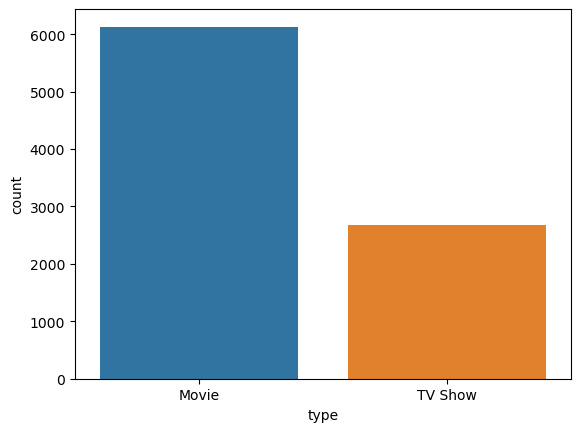

In [99]:
sns.countplot(x ='type', data = df)
plt.show()

**Observation:** As can be seen there is almost twice the number of movies than TV shows on Netflix

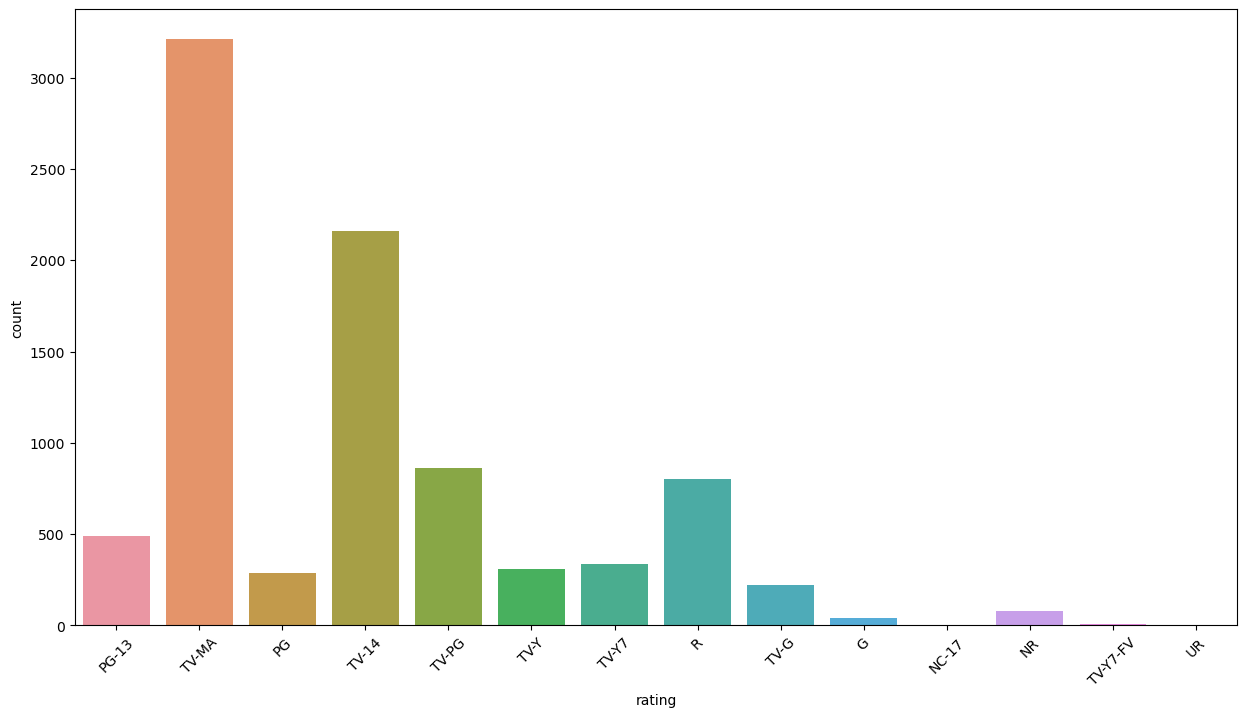

In [106]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='rating', data = df)
plt.show()

**Observation:** Most of the content is rated as TV-MA, TV-14,TV-PG, R

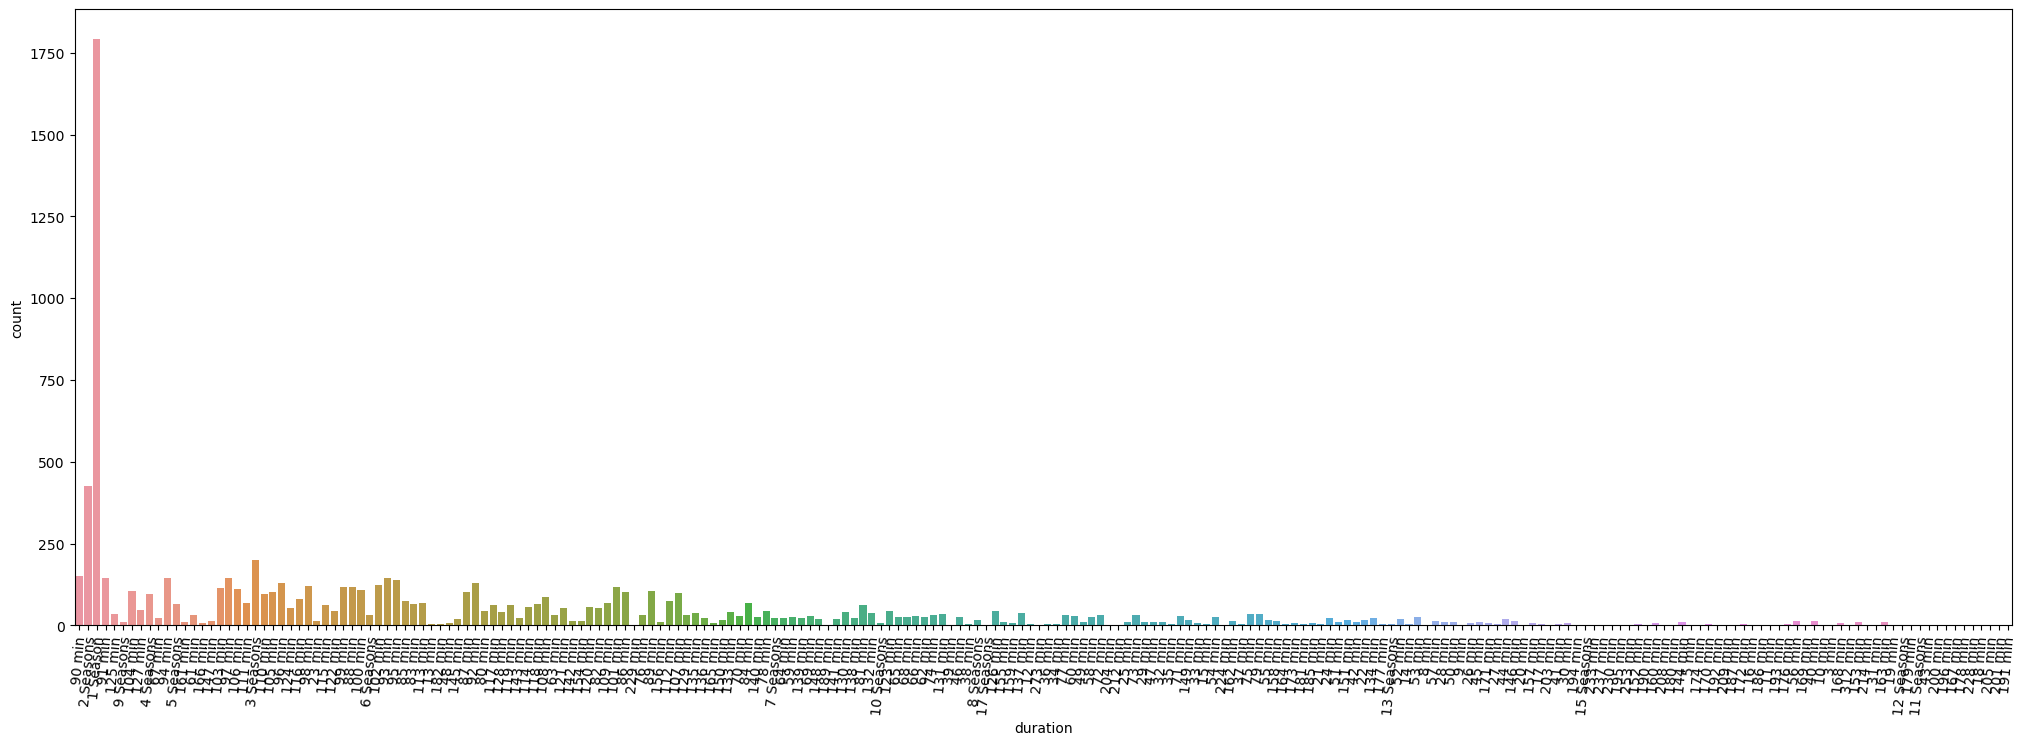

In [110]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=85)
sns.countplot(x ='duration', data = df)
plt.show()

**Observation:** As can be seen on the left side most of the content is of length 90 min, 2 Season and 1 Season

### How has the number of movies released per year changed over the last 20-30 years?

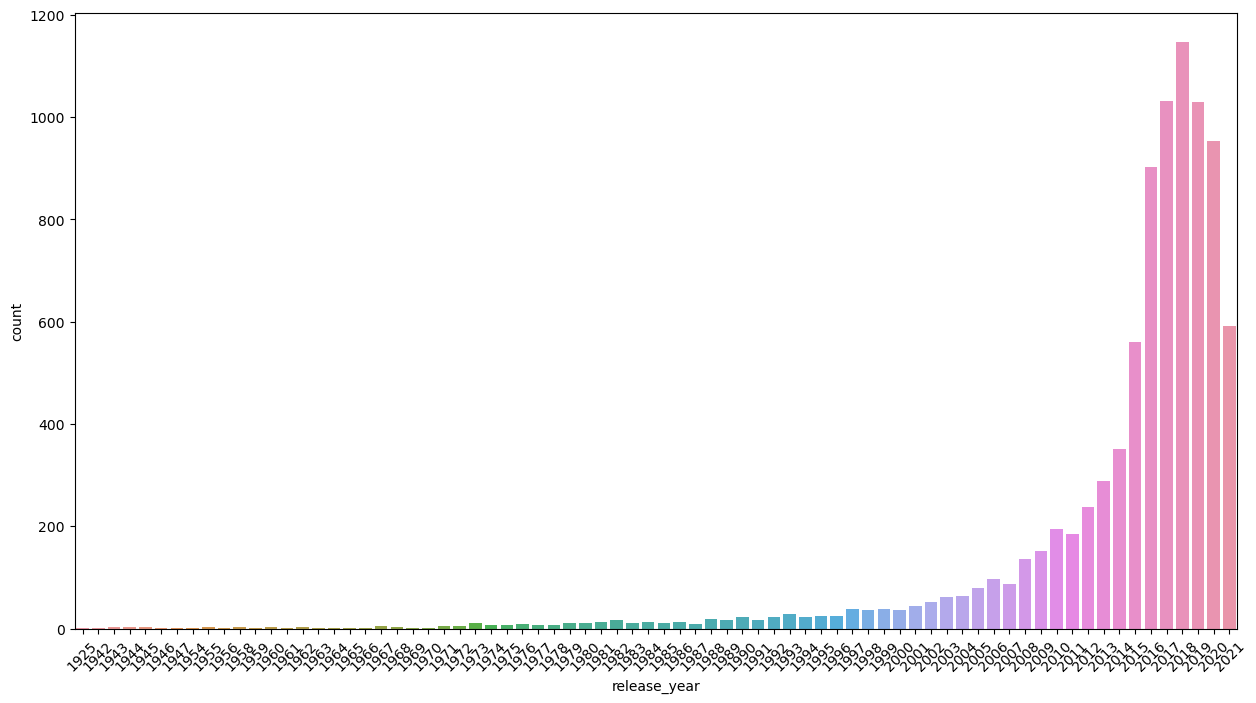

In [105]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='release_year', data = df)
plt.show()

**Observation:** as can be seen from the right side of the plot maximum number of content was published in 2018 after which there is a steady decline each year

## For categorical variable(s): Boxplot

<AxesSubplot:xlabel='category', ylabel='release_year'>

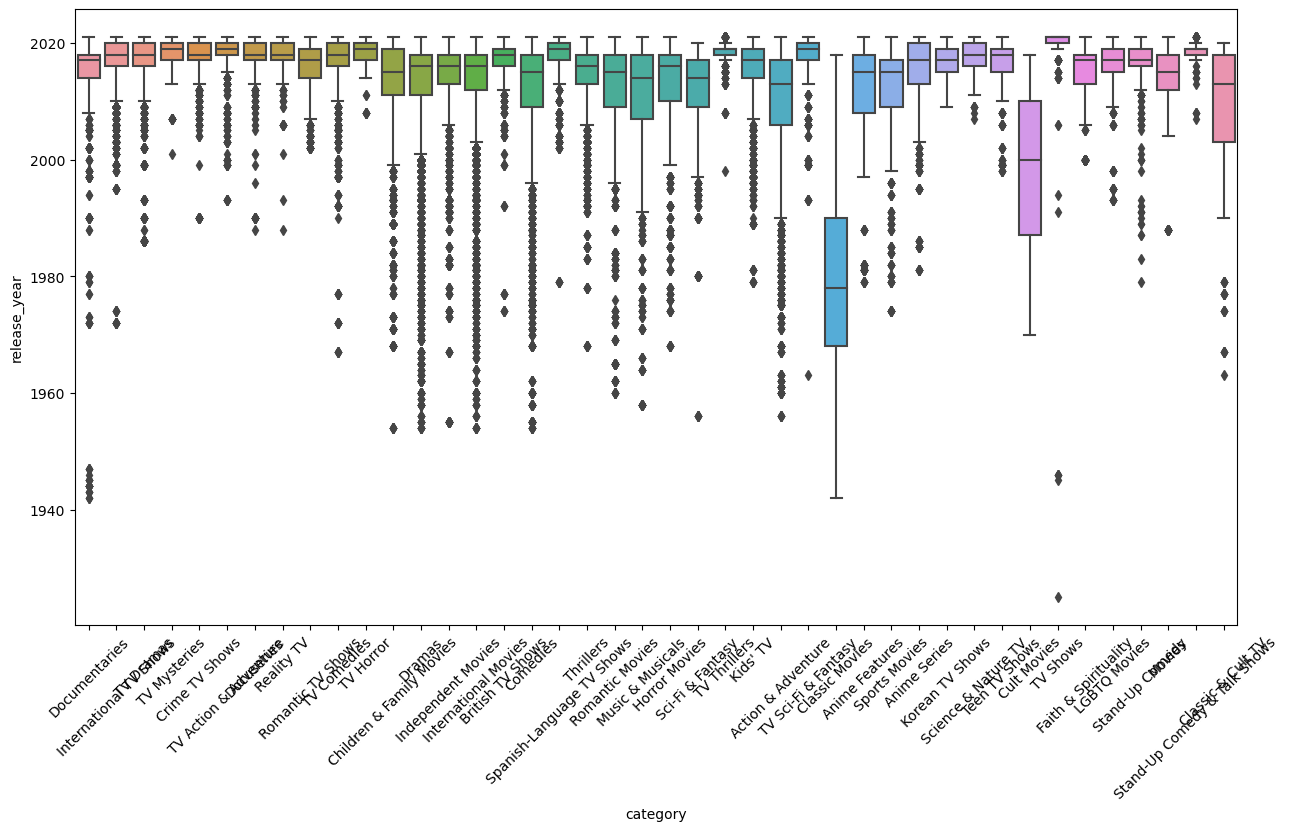

In [117]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(x = 'category', y= "release_year", data = temp)

**Observation:** As can be seen Classic and cult movies are not that common in the 2020s, whereas new categories such as Standup comedy, Anime and TV-scifi are emerging 

## For correlation: Heatmaps, Pairplots

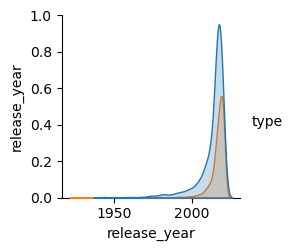

In [118]:
sns.pairplot(df, hue='type')

**Observation:** The amount of content being consumed is at an all time high in the recent 2020s for both TV shows and Movies

# Insights based on Non-Graphical and Visual Analysis

***All the insights and observations are mentioned next to each cell after both graphical and non-graphical analysis is done. Marked as "Observation"***

# Business Insights

***All the insights and observations are mentioned next to each cell after both graphical and non-graphical analysis is done. Marked as "Observation"***

# Recommendations

**Recommendations:**
> 1. More TV shows needs to be released
> 2. TV Shows should be available in more genres / categories like Movies
> 3. Some countries have only 1 or 2 categories of content available so more Movies and TV-shows under different categories should be release in those countries, since that would appeal a wider audience.
> 4. Some countries have content only available under 1 or 2 ratings, which might make it age restrictive. So content from a wider range of ratings needs to be release in those under-served countries.
> 5. More attention needs to be paid to the new and emerging genres / categories
> 6. there has been a dip in the number of movies and TV-Shows released each year since 2019. So more movies and TV-shows needs to be release each year